In [1]:
import h2o
import pandas as pd
from h2o.automl import H2OAutoML

In [3]:
h2o.init(nthreads=-1, max_mem_size=9)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,21 secs
H2O_cluster_timezone:,Asia/Seoul
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_mujin_o36p8h
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,9 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [4]:
data = "https://raw.githubusercontent.com/Nyscrodia/WeatherForecasting/master/time_data/ASOS_TIM.csv"
df = h2o.import_file(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [5]:
df.describe()

Rows:8760
Cols:17

,spot,spotName,date,Ta,Rn(mm),Ws(m/s),Wd(16D),Hm(%),Pa(hPa),Ps(hPa),Ss(hr),Gsr(MJ/m2),Snow(cm),DpthFhsc(cm),Tca(10),CloudForm,Ts
type,int,enum,string,real,int,real,int,int,real,real,real,real,real,real,int,enum,real
mins,108.0,,NaN,-18.5,0.0,0.0,0.0,19.0,986.9,996.5,0.0,0.0,0.0,0.0,0.0,,-12.7
mean,108.0,,NaN,13.736678082191784,1.256059009483667,2.311269696277689,169.66773235898606,65.58926940639269,1006.047785388128,1016.2816210045662,0.4583802963890627,1.0767063243581716,1.3976253298153036,0.9620689655172413,4.959922356702444,,14.731844660194177
maxs,108.0,,NaN,36.3,65.0,8.3,360.0,100.0,1025.8,1037.4,1.0,3.74,5.1,4.4,10.0,,56.8
sigma,0.0,,NaN,10.896708289692606,3.4373196401775754,1.1208549527775016,107.5469697500971,18.39322668572162,7.928486283081569,8.312023328685694,0.43878771863515936,0.9664399973272517,1.3573899857950176,1.4241322654022013,3.92938893199948,,12.043577117923805
zeros,0,,0,16,602,8,181,0,0,0,1824,167,17,9,2405,,31
missing,0,0,0,0,7811,2,2,0,0,0,3969,3969,8381,8731,2,3813,5
0,108.0,Seoul,2021-01-01 0:00,-8.3,nan,1.8,250.0,66.0,1016.4,1027.7,nan,nan,nan,nan,0.0,,-6.8
1,108.0,Seoul,2021-01-01 1:00,-8.7,nan,2.4,270.0,68.0,1016.4,1027.7,nan,nan,nan,nan,0.0,,-6.9
2,108.0,Seoul,2021-01-01 2:00,-9.1,nan,1.6,270.0,69.0,1016.2,1027.5,nan,nan,nan,nan,0.0,,-7.1


In [6]:
df['Rn(mm)'] = df['Rn(mm)'].asfactor()
print(df['Rn(mm)'].levels())

[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '16', '19', '22', '27', '30', '65']]


In [9]:
splits = df.split_frame(ratios=[0.8, 0.1], seed=1)
train = splits[0]
valid = splits[1]
test = splits[2]

In [10]:
print(train.nrow)
print(valid.nrow)
print(test.nrow)

7026
860
874


In [11]:
y = 'Rn(mm)'
x = list(df.columns)

In [12]:
x.remove(y)
print(x)

['spot', 'spotName', 'date', 'Ta', 'Ws(m/s)', 'Wd(16D)', 'Hm(%)', 'Pa(hPa)', 'Ps(hPa)', 'Ss(hr)', 'Gsr(MJ/m2)', 'Snow(cm)', 'DpthFhsc(cm)', 'Tca(10)', 'CloudForm', 'Ts']


In [13]:
aml = H2OAutoML(max_models=10, max_runtime_secs=1000, seed=1)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

AutoML progress: |█
09:38:09.697: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
09:38:09.705: AutoML: XGBoost is not available; skipping it.
09:38:09.759: _train param, Dropping bad and constant columns: [date, spot, spotName]
09:38:10.307: GLM_1_AutoML_1_20221128_93809 [GLM def_1] failed: java.lang.ArrayIndexOutOfBoundsException: Index 51 out of bounds for length 51
09:38:10.316: _train param, Dropping bad and constant columns: [date, spot, spotName]

██
09:38:18.787: _train param, Dropping bad and constant columns: [date, spot, spotName]

███
09:38:32.623: _train param, Dropping bad and constant columns: [date, spot, spotName]

█
09:38:39.740: _train param, Dropping bad and constant columns: [date, spot, spotName]

██
09:38:47.823: _train param, Dropping bad and constant colu

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20221128_93809_model_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    31                 620                         294927                 7            16           9.79839       1             39            32.4645

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.08899006406736062
RMSE: 0.29831202467778706
LogLoss: 0.2894939744253468
Mean Per-Class Error: 0.0473993335118971
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0      1      2     3     4     5     6    7    8    9    10    11    12    13    14    16    19    22    27    30    65    Error                Rate
-----  -----  ----  ----  ----  ----  ---  ---  ---  ---  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  -------------------  --------
487.0  4.0    0.0   0.0   1.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.01016260162601626  5 / 492
17.0   106.0  0.0   0.0   1.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.14516129032258066  18 / 124
2.0    2.0    42.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.08695652173913043  4 / 46
1.0    1.0    0.0   21.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.08695652173913043  2 / 23
1.0    2.0    0.0   0.0   20.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.13043478260869565  3 / 23
0.0    0.0    0.0   0.0   0.0   10.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0                  0 / 10
0.0    0.0    0.0   0.0   0.0   0.0   8.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0                  0 / 8
0.0    1.0    0.0   0.0   0.0   0.0   0.0  3.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.25                 1 / 4
2.0    0.0    0.0   0.0   0.0   0.0   0.0  0.0  5.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.2857142857142857   2 / 7
0.0    0.0    0.0   0.0   0.0   0.0   0.0  0.0  0.0  4.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0                  0 / 4
---    ---    ---   ---   ---   ---   ---  ---  ---  ---  ---   ---   ---   ---   ---   ---   ---   ---   ---   ---   ---   ---                  ---
0.0    0.0    0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0   2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0                  0 / 2
0.0    0.0    0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0   0.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0                  0 / 3
0.0    0.0    0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0                  0 / 2
0.0    0.0    0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0                  0 / 1
0.0    0.0    0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0                  0 / 1
0.0    0.0    0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0

In [14]:
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))

model_id                                                  mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_1_20221128_93809_model_1                            0.876832    1.28229  0.567925  0.322539
DRF_1_AutoML_1_20221128_93809                                         0.88048     1.79429  0.560908  0.314617
GBM_4_AutoML_1_20221128_93809                                         0.880609    1.30434  0.573213  0.328574
GBM_5_AutoML_1_20221128_93809                                         0.880629    1.35423  0.576849  0.332754
GBM_2_AutoML_1_20221128_93809                                         0.883424    1.30553  0.574205  0.329711
GBM_3_AutoML_1_20221128_93809                                         0.883902    1.30131  0.56976   0.324626
DeepLearning_1_AutoML_1_20221128_93809                                0.884296    1.13369  0.555009  0.308035
GBM_1_AutoML_1_20221128_93809                                         0.885125    1.15519  0.571281  0.326362
XRT_1_Auto

In [15]:
aml.leader.download_mojo(path="./")
model_path = h2o.save_model(aml.leader, path="./titanic_bin")

In [16]:
saved_model= h2o.load_model(model_path)

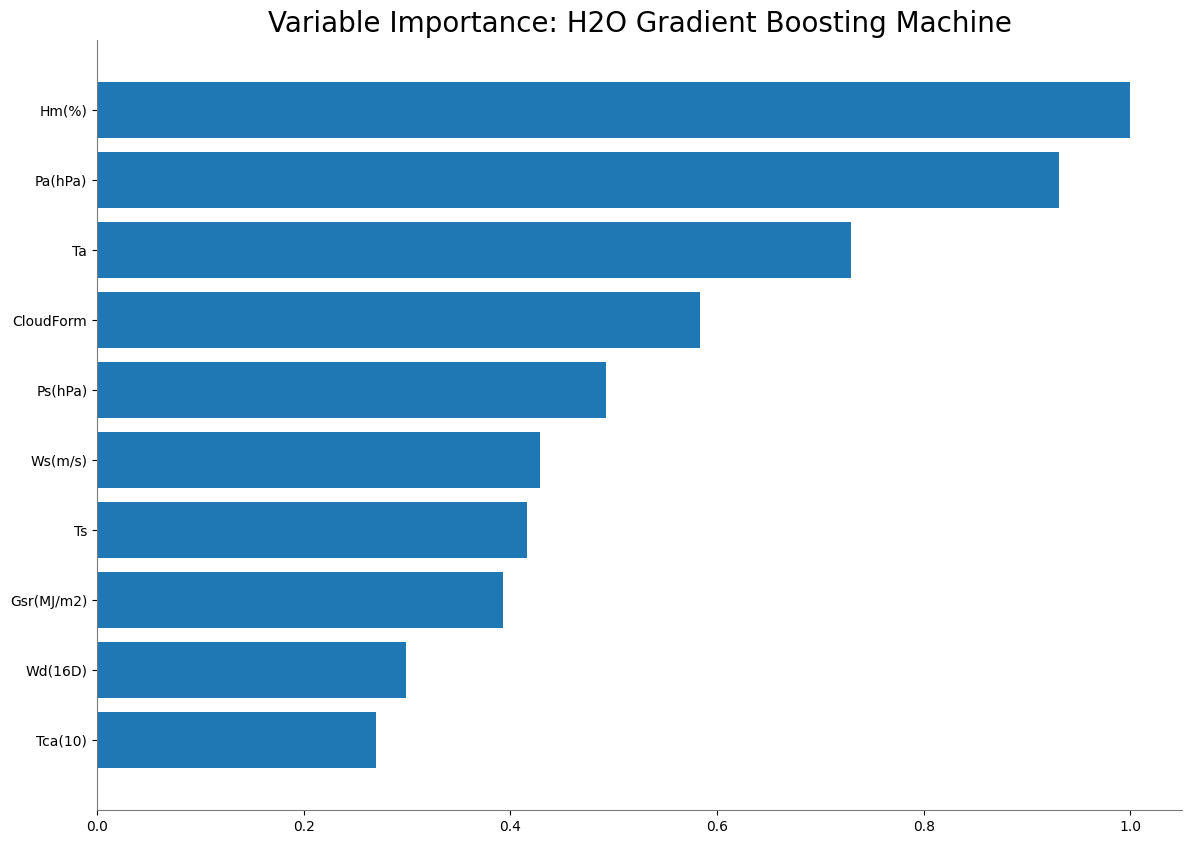

<Figure size 640x480 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
aml.leader.varimp_plot()

In [23]:
performance = aml.leader.model_performance(test)

model_id=aml.leader.model_id
#accuracy = performance.accuracy()
#precision = performance.precision()
#recall = performance.recall()
#F1 = performance.F1()
auc = performance.auc()
variable_importance=aml.leader.varimp()
#aic = performance.aic()

KeyError: 'AIC'

In [22]:
label_predicted=get_aml.predict(test)

print(label_predicted['Rn(mm)'])

GBM_grid_1_AutoML_1_20221128_93809_model_1 NaN
<br>
ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.3828869367494766
RMSE: 0.6187785845918365
LogLoss: 1.5285031056927352
Mean Per-Class Error: 0.505172244336331
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0     1     2    3    4    5    6    7    8    9    10    11    12    13    14    16    19    22    27    30    65    Error                Rate
----  ----  ---  ---  ---  ---  ---  ---  ---  ---  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  -------------------  --------
55.0  2.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.